# Day Agenda

![](agenda.png)

## Classification

* Machine Learning classification is the process of predicting the class of given data set.

* class/ Target/ categories/ labels


* This type of  modeling, aproximating the mapping function (f) from input variables(X) to discrete output variables (y)
* Predicting Discrete values like pass/ fail, live/died..etc



```y = f(X)```


## Types of Classifications

**Based on Prediction**
* Lazy learners
     * take less time to train and more time to predict
     
* eager learner
     * takes more time to training a model but less time to predict
     
     
**Based on Target**

* Binary CLassification
     * only two possible outcomes 
     * titanic -- servived/not
     * cancer  -- cancer/ not
     
* Multi-class classification
    * more than two outcomes
    * birds -- 6 [r,t,p,sw,so,s]
    * iris datasets - 3 class 
    
* Multi-label classification
    * rice bag -- different retailers 
    
* Imbalanced Classification
    * covid test cases 70k --- 1000 to 2500 shows positive and remaing all shows negative
    

### K-Nearest Neighbors 
**“things that look alike must be alike.”**

* Nearest Neighbor algorithms are among the simplest of all machine learning algorithms
* This algorithm is versatile. It can be used for classification, regression
* KNN is completely based on distance between any two elements
![distance.png](distance.png)



### KNN used for:
* Binary Classification 
    * only two possible outcomes 
            
* Multi-class classification
    * Target may be scalar values but having more than two labels(classes/groups)
    

### What KNN says:
**Show me your friends(Neighbors) and then i will tell you who you are**

* people who are having mindset/ culture/ way of living are stay together so we called as neighbors/ friends

* people livinh based on caste/ designations/ religions

### Characteristics of a KNN Model

* Fast to create model because it simply stores data
* Slow to predict because many distance calculations
* Can require lots of memory if data set is large

* lazy learner -- KNN 


In [2]:
# classify the seasons
temp = [23,20,22,19,32,35,40,42]
hum = [20,25,23,26,30,34,32,36]
season = ["w",'w','w','w','s','s','s','s']
# s -- summer
# w --  winter

In [3]:
import pandas as pd

In [4]:
df = pd.DataFrame([temp,hum,season]).T

In [6]:
df.columns = ["Temp","Hum","Season"]

In [7]:
import matplotlib.pyplot as plt

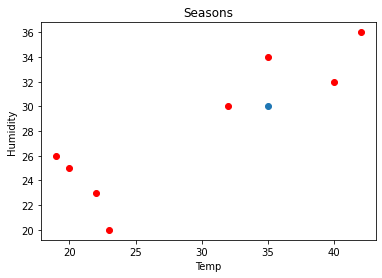

In [12]:
plt.scatter(df["Temp"],df["Hum"], c  = 'r')
plt.title("Seasons")
plt.xlabel("Temp")
plt.ylabel("Humidity")
plt.scatter(35,30)  # predicted value
plt.show()

In [13]:
from sklearn.neighbors import KNeighborsClassifier


In [14]:
knn = KNeighborsClassifier()

In [16]:
X = df[["Temp","Hum"]]
y = df["Season"]

In [17]:
knn.fit(X,y)

KNeighborsClassifier()

In [18]:
knn.predict([[35,30]])

array(['s'], dtype=object)

In [23]:
# x1,y1,x2,y2  
x2,y2 = 35,30
import numpy as np
for i in range(len(df)):
    x1,y1 = df["Temp"][i],df["Hum"][i]
    #print(x1,y1)
    print("Distance between ",(x1,y1),"&",(x2,y2),np.sqrt((x2-x1)**2) + (y2-y1)**2)

Distance between  (23, 20) & (35, 30) 112.0
Distance between  (20, 25) & (35, 30) 40.0
Distance between  (22, 23) & (35, 30) 62.0
Distance between  (19, 26) & (35, 30) 32.0
Distance between  (32, 30) & (35, 30) 3.0
Distance between  (35, 34) & (35, 30) 16.0
Distance between  (40, 32) & (35, 30) 9.0
Distance between  (42, 36) & (35, 30) 43.0


### How does the KNN algorithm work?
In KNN, K is the number of nearest neighbors. The number of neighbors is the core deciding factor. K is generally an odd number if the number of classes is 2. When K=1, then the algorithm is known as the nearest neighbor algorithm. This is the simplest case. Suppose P1 is the point, for which label needs to predict. First, you find the one closest point to P1 and then the label of the nearest point assigned to P1.

![download.png](download.png)

Suppose P1 is the point, for which label needs to be predicted. First, you find the k closest points to P1 and then classify point by majority vote of its k neighbors. Each object votes for their class and the class with the most votes is taken as the prediction. For finding closest similar points, you find the distance between points using distance measures such as Euclidean distance, Hamming distance, Manhattan distance and Minkowski distance. KNN has the following basic steps:
* Calculate distance
* Find closest neighbors
* Vote for labels

![download%20%281%29.png](download%20%281%29.png)

## Curse of Dimensionality

* KNN performs better with a lower number of features than a large number of features.
* You can say that when the number of features increases than it requires more data.
* Increase in dimension also leads to the problem of overfitting. 
* To avoid overfitting, the needed data will need to grow exponentially as you increase the number of dimensions. 
* This problem of higher dimension is known as the Curse of Dimensionality.

* overcome this curse of dimensionality , we will use PCA(Principal Componenet Analysis)


## KNN using orange_telecom_churned

customer churn data from the telecom industry for this week's exercises
[dataset_Link](https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Datasets/master/Classification/Orange_Telecom_Churn_Data.csv)

In [24]:
# importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", module = "sklearn")

In [25]:
df = pd.read_csv("https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Datasets/master/Classification/Orange_Telecom_Churn_Data.csv")
df.head()

# orange_telecom_churned_data

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [26]:
df.shape

(5000, 21)

In [27]:
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number', 'intl_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churned'],
      dtype='object')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   object 
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   phone_number                   5000 non-null   object 
 4   intl_plan                      5000 non-null   object 
 5   voice_mail_plan                5000 non-null   object 
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               5000 non-null   f

In [29]:
df.isna().sum()

state                            0
account_length                   0
area_code                        0
phone_number                     0
intl_plan                        0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churned                          0
dtype: int64

## Data Cleaning

In [30]:
df.loc[0]

state                                  KS
account_length                        128
area_code                             415
phone_number                     382-4657
intl_plan                              no
voice_mail_plan                       yes
number_vmail_messages                  25
total_day_minutes                   265.1
total_day_calls                       110
total_day_charge                    45.07
total_eve_minutes                   197.4
total_eve_calls                        99
total_eve_charge                    16.78
total_night_minutes                 244.7
total_night_calls                      91
total_night_charge                  11.01
total_intl_minutes                     10
total_intl_calls                        3
total_intl_charge                     2.7
number_customer_service_calls           1
churned                             False
Name: 0, dtype: object

In [31]:
df.drop(["state","area_code","phone_number"],axis = 1, inplace = True)

In [32]:
df.shape

(5000, 18)

In [33]:
# categorial data into numerics

df["intl_plan"].value_counts()

no     4527
yes     473
Name: intl_plan, dtype: int64

In [34]:
df["voice_mail_plan"].value_counts()

no     3677
yes    1323
Name: voice_mail_plan, dtype: int64

In [35]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()

In [36]:
for col in ["voice_mail_plan","intl_plan","churned"]:
    df[col] = lb.fit_transform(df[col])

In [37]:
df.head()

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


# Preprocessing Techniques

* Data Preprocessing is a technique that is used to convert the raw data into a clean data set

### Data preprocessing steps

* Loading data 
* Exploring data 
* Cleaning data  
* Transforming data 

    * will learn data preprocessing techniques with scikit-learn, one of the most popular frameworks used for industry data science
    * The scikit-learn library includes tools for data preprocessing and data mining. It is imported in Python via the statement import sklearn.

![ddd.PNG](ddd.PNG)

### Data Imputation 

* if the dataset is missing too many values, we just don't use it
*  if only a few of the values are missing, we can perform data imputation to substitute the missing data with some other value(s).
* There are many different methods for data imputation
    * Using the mean value
    * Using the median value
    * Using the most frequent value
    * Filling in missing values with a constant



## Feature Scaling

### 1. Standardizing Data
                    

* Data scientists will convert the data into a standard format to make it easier to understand.
* The standard format refers to data that has 0 mean and unit variance (i.e. standard deviation = 1), and the process of    converting data into this format is called data standardization.
* improve the performance of models
* it rescales the data to have mean = 0 and varience(statistical measure that provides indicator of data's dispresion) = 1

* Standardization rescales data so that it has a mean of 0 and a standard deviation of 1.
* The formula for this is:  (𝑥 − 𝜇)/𝜎

    * We subtract the mean (𝜇) from each value (x) and then divide by the standard deviation (𝜎)
    
![stddata.PNG](stddata.PNG)

![std.PNG](std.PNG)

    
### 2. Data Range

* Scale data by compressing it into a fixed range
* One of the biggest use cases for this is compressing data into the range [0, 1]
* Classifier is MinMaxScaler 

![minmax.PNG](minmax.PNG)

### 3. Normalizing Data

* Want to scale the individual data observations (i.e. rows)
* Used in classification Problems and data mining 
* **ex : columns : salary,ex_yr,position_levels**
* when clustering data we need to apply L2 normalization to each row
* L2 normalization applied to a particular row of a data array 
* L2 norm of a row is just the square root of the sum of squared values for the row

![normal.PNG](normal.PNG)


### 4. Robust Scaling
* Deal with is outliers (data point that is significantly further away from the other data points)
* Robustly scale the data, i.e. avoid being affected by outliers
* Scaling by using data's median and Interquartile Range (IQR)
* Here mean affected but median remains same
* Subtract the median from each data value then scale to the IQR




12kg, 34gm, 46mm, 4tone --- 

total weight -- 
convert all these data into same unit -- 

Scaling


In [38]:
# appling preprocessing Technique


In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
mnScl = MinMaxScaler()

In [48]:
mnScl = mnScl.fit_transform(df)

In [49]:
df_scl = pd.DataFrame(mnScl)

In [52]:
df_scl.columns = df.columns
df_scl

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,0.524793,0.0,1.0,0.480769,0.754196,0.666667,0.754183,0.542755,0.582353,0.542866,0.619494,0.520000,0.619584,0.500,0.15,0.500000,0.111111,0.0
1,0.438017,0.0,1.0,0.500000,0.459744,0.745455,0.459672,0.537531,0.605882,0.537690,0.644051,0.588571,0.644344,0.685,0.15,0.685185,0.111111,0.0
2,0.561983,0.0,0.0,0.000000,0.692461,0.690909,0.692436,0.333242,0.647059,0.333225,0.411646,0.594286,0.411930,0.610,0.25,0.609259,0.000000,0.0
3,0.342975,1.0,0.0,0.000000,0.851778,0.430303,0.851740,0.170195,0.517647,0.170171,0.498481,0.508571,0.498593,0.330,0.35,0.329630,0.222222,0.0
4,0.305785,1.0,0.0,0.000000,0.474253,0.684848,0.474230,0.407754,0.717647,0.407959,0.473165,0.691429,0.473270,0.505,0.15,0.505556,0.333333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.202479,0.0,1.0,0.769231,0.670555,0.769697,0.670515,0.613143,0.741176,0.613394,0.753165,0.662857,0.753517,0.495,0.25,0.494444,0.222222,0.0
4996,0.623967,0.0,0.0,0.000000,0.524040,0.545455,0.523929,0.706076,0.429412,0.706244,0.540759,0.645714,0.540799,0.735,0.10,0.735185,0.333333,1.0
4997,0.247934,0.0,0.0,0.000000,0.400000,0.539394,0.399933,0.475117,0.752941,0.475251,0.537722,0.554286,0.537985,0.680,0.20,0.679630,0.111111,0.0
4998,0.446281,0.0,0.0,0.000000,0.537127,0.406061,0.537149,0.472092,0.541176,0.472016,0.568101,0.508571,0.568374,0.425,0.30,0.425926,0.000000,0.0


In [53]:
df_scl.max()

account_length                   1.0
intl_plan                        1.0
voice_mail_plan                  1.0
number_vmail_messages            1.0
total_day_minutes                1.0
total_day_calls                  1.0
total_day_charge                 1.0
total_eve_minutes                1.0
total_eve_calls                  1.0
total_eve_charge                 1.0
total_night_minutes              1.0
total_night_calls                1.0
total_night_charge               1.0
total_intl_minutes               1.0
total_intl_calls                 1.0
total_intl_charge                1.0
number_customer_service_calls    1.0
churned                          1.0
dtype: float64

In [54]:
df_scl.min()

account_length                   0.0
intl_plan                        0.0
voice_mail_plan                  0.0
number_vmail_messages            0.0
total_day_minutes                0.0
total_day_calls                  0.0
total_day_charge                 0.0
total_eve_minutes                0.0
total_eve_calls                  0.0
total_eve_charge                 0.0
total_night_minutes              0.0
total_night_calls                0.0
total_night_charge               0.0
total_intl_minutes               0.0
total_intl_calls                 0.0
total_intl_charge                0.0
number_customer_service_calls    0.0
churned                          0.0
dtype: float64

In [60]:
mini = df["account_length"].min()

In [61]:
maxa  = df["account_length"].max()

In [63]:
(df["account_length"][0] - mini ) / (maxa - mini)  # manually calculation 

0.5247933884297521

In [64]:
# training and Testing

from sklearn.model_selection import train_test_split

In [65]:
X = df_scl[df.columns[:-1]]
X

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,0.524793,0.0,1.0,0.480769,0.754196,0.666667,0.754183,0.542755,0.582353,0.542866,0.619494,0.520000,0.619584,0.500,0.15,0.500000,0.111111
1,0.438017,0.0,1.0,0.500000,0.459744,0.745455,0.459672,0.537531,0.605882,0.537690,0.644051,0.588571,0.644344,0.685,0.15,0.685185,0.111111
2,0.561983,0.0,0.0,0.000000,0.692461,0.690909,0.692436,0.333242,0.647059,0.333225,0.411646,0.594286,0.411930,0.610,0.25,0.609259,0.000000
3,0.342975,1.0,0.0,0.000000,0.851778,0.430303,0.851740,0.170195,0.517647,0.170171,0.498481,0.508571,0.498593,0.330,0.35,0.329630,0.222222
4,0.305785,1.0,0.0,0.000000,0.474253,0.684848,0.474230,0.407754,0.717647,0.407959,0.473165,0.691429,0.473270,0.505,0.15,0.505556,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.202479,0.0,1.0,0.769231,0.670555,0.769697,0.670515,0.613143,0.741176,0.613394,0.753165,0.662857,0.753517,0.495,0.25,0.494444,0.222222
4996,0.623967,0.0,0.0,0.000000,0.524040,0.545455,0.523929,0.706076,0.429412,0.706244,0.540759,0.645714,0.540799,0.735,0.10,0.735185,0.333333
4997,0.247934,0.0,0.0,0.000000,0.400000,0.539394,0.399933,0.475117,0.752941,0.475251,0.537722,0.554286,0.537985,0.680,0.20,0.679630,0.111111
4998,0.446281,0.0,0.0,0.000000,0.537127,0.406061,0.537149,0.472092,0.541176,0.472016,0.568101,0.508571,0.568374,0.425,0.30,0.425926,0.000000


In [66]:
y = df_scl["churned"]

In [73]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [74]:
from sklearn.neighbors import KNeighborsClassifier

In [75]:
knn = KNeighborsClassifier(n_neighbors=3)


In [76]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [77]:
y_pred = knn.predict(X_test)

In [79]:
def accuracy(y_test,y_pred):
    return sum(y_test == y_pred) / len(y_test)

In [81]:
accuracy(y_test,y_pred)*100

89.60000000000001

In [82]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [84]:
accuracy_score(y_test,y_pred)*100

89.60000000000001

In [86]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1
0,1264,17
1,139,80


In [89]:
# fit our model by changing k values range from 1 - 10
di = {}
for k in range(1,11):
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    print("Accuracy of ",k, "is", round(accuracy_score(y_test,y_pred),3))
    di[k ] = round(accuracy_score(y_test,y_pred),3)

Accuracy of  1 is 0.879
Accuracy of  2 is 0.889
Accuracy of  3 is 0.896
Accuracy of  4 is 0.889
Accuracy of  5 is 0.895
Accuracy of  6 is 0.883
Accuracy of  7 is 0.891
Accuracy of  8 is 0.886
Accuracy of  9 is 0.894
Accuracy of  10 is 0.887


In [91]:
di.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [92]:
di.values()

dict_values([0.879, 0.889, 0.896, 0.889, 0.895, 0.883, 0.891, 0.886, 0.894, 0.887])

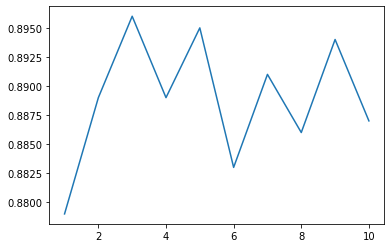

In [94]:
plt.plot(list(di.keys()),list(di.values()))
plt.show()

# KNN multi class classification

* more than two class

In [95]:
from sklearn.datasets import load_iris

In [96]:
iris = load_iris()

In [97]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [98]:
iris_df = pd.DataFrame(iris.data,columns = iris.feature_names)

In [100]:
iris_df["Target"] = iris.target

In [102]:
iris_df["Target"].value_counts()

2    50
1    50
0    50
Name: Target, dtype: int64

In [103]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [104]:
iris_df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Target               0
dtype: int64

In [105]:
from sklearn.model_selection import train_test_split


In [107]:
X = iris_df[iris_df.columns[:-1]]
y = iris_df["Target"]

In [108]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [109]:
from sklearn.neighbors import KNeighborsClassifier

In [110]:
k = KNeighborsClassifier(n_neighbors=3)

In [111]:
k.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [113]:
y_prd  = k.predict(X_test)

In [115]:
accuracy(y_test,y_prd)

0.9777777777777777

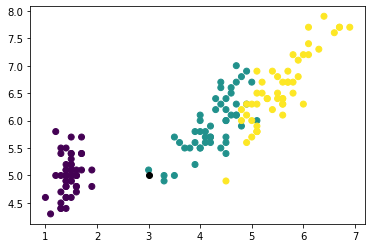

In [120]:
x2,y2 = 3,5
plt.scatter(iris_df["petal length (cm)"],iris_df["sepal length (cm)"], c = iris_df["Target"])
plt.scatter(3,5, c = "black")
plt.show()

In [116]:
iris_df.columns


Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Target'],
      dtype='object')

## How do you decide the number of neighbors in KNN?

* The number of neighbors(K) in KNN is a hyperparameter that you need choose at the time of model building. 
* You can think of K as a controlling variable for the prediction model.
* No. of neighbors, it depends on Each dataset has it's own requirements
* Small number of neighbors, the noise will have a higher influence on the result
* large number of neighbors make it computationally expensive

* **choosen odd number if the number of classes is even**

![download%20%282%29.png](download%20%282%29.png)